In [20]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [245]:
digits = load_digits(n_class=2)

In [246]:
digits.data.shape

(360, 64)

In [247]:
digits.images.shape

(360, 8, 8)

In [248]:
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

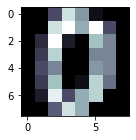

In [249]:
plt.figure(figsize=(2,2))
plt.imshow(X, cmap='bone');

# Train  SVD on single image

In [250]:
u, s, vh = np.linalg.svd(X)
u.shape, s.shape, vh.shape

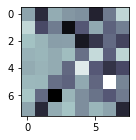

In [251]:
plt.figure(figsize=(2,2))
plt.imshow(u, cmap='bone');

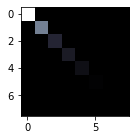

In [252]:
plt.figure(figsize=(2,2))
plt.imshow(np.diag(s), cmap='bone');

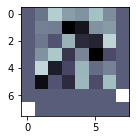

In [253]:
plt.figure(figsize=(2,2))
plt.imshow(vh, cmap='bone');

In [254]:
r = 2
X_rec = np.dot(u[:,:r] * s[:r], vh[:r,:])

<Figure size 288x144 with 0 Axes>

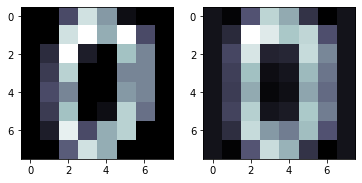

In [255]:
def plot_vs(X, X_rec):
    plt.figure(figsize=(4,2))
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(X, cmap='bone');
    ax2.imshow(X_rec, cmap='bone');
plot_vs(X, X_rec)

In [256]:
u[:,:r]

array([[ 0.22714678, -0.48992739],
       [ 0.53908005, -0.27328068],
       [ 0.38773218,  0.31858921],
       [ 0.30217909,  0.32385608],
       [ 0.26338915,  0.31429094],
       [ 0.33510624,  0.32908792],
       [ 0.42331758, -0.08219089],
       [ 0.23511864, -0.51485336]])

In [264]:
class Compressor:
    def __init__(self, s, vh, r):
        self.s = s
        self.vh = vh
        self.r = r
        
    def compress(self, X):
        s = self.s
        vh = self.vh
        r = self.r
        return (X @(vh[:r,:X.shape[1]]).T) / s[:r]

    def decompress(self, U):
        s = self.s
        vh = self.vh
        r = self.r
        return np.dot(u[:,:r] * s[:r], vh[:r,:X.shape[1]])
    
c = Compressor(s, vh, 2)    

<Figure size 288x144 with 0 Axes>

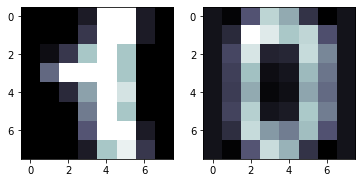

In [265]:
i = 5
X1 = digits.images[i]
plot_vs(X1,c.decompress(c.compress(X1)))

# Train on 1

In [ ]:
u, s, vh = np.linalg.svd(X)
u.shape, s.shape, vh.shape

# Try SVD on two images (one 0, one 1)

In [258]:

X.shape

(8, 16)

In [ ]:
X = digits.images[0]
u, s, vh = np.linalg.svd(X)
u.shape, s.shape, vh.shape

In [ ]:
X = digits.images[1]
u, s, vh = np.linalg.svd(X)
u.shape, s.shape, vh.shape

In [263]:
compressor = Compressor(s, vh, 4)

<Figure size 288x144 with 0 Axes>

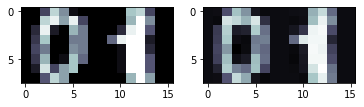

In [260]:
plot_vs(X,compressor.decompress(compressor.compress(X)))

<Figure size 288x144 with 0 Axes>

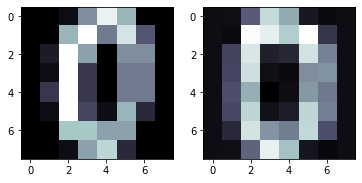

In [261]:
X = digits.images[2]
plot_vs(X,compressor.decompress(compressor.compress(X)))

<Figure size 288x144 with 0 Axes>

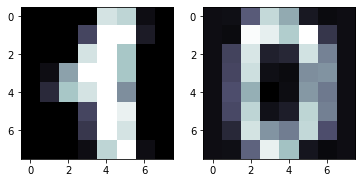

In [262]:
X = digits.images[3]
plot_vs(X,compressor.decompress(compressor.compress(X)))